# # Importing necessary libraries

In [13]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd


import matplotlib.pyplot as plt


In [14]:
#reading the file

In [15]:
ab =pd.read_csv("C:/Users/LAPTOP/Downloads/50_Startups.csv")

In [16]:
ab.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [17]:
#checking the null value
ab.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

#  Plotting Graphs

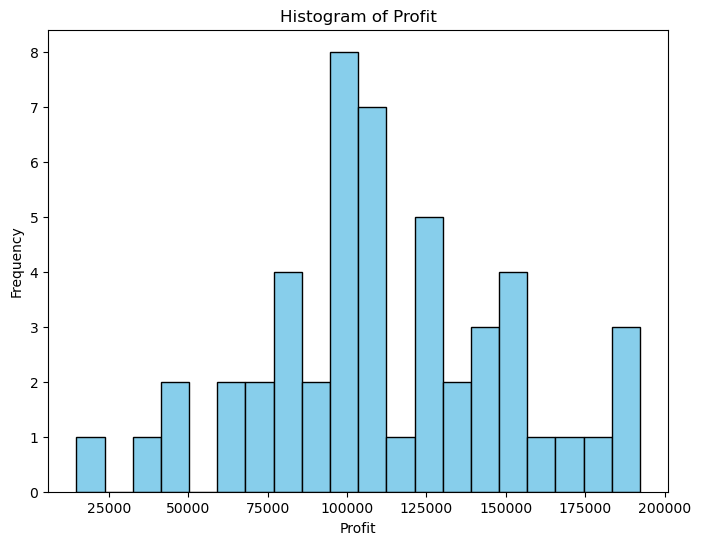

In [18]:

plt.figure(figsize=(8, 6))
plt.hist(ab['Profit'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()


# i) Construct Different Regression algorithms 

In [32]:
X_train = ab[['R&D Spend', 'Administration', 'Marketing Spend']]  # Features
y_train = ab['Profit']





# Linear Regression


In [20]:
# Create regression models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [21]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()




# Ridge Regression 


In [22]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_reg.fit(X_train, y_train)

Ridge()




# Lasso Regression


In [23]:
# Lasso Regression
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_reg.fit(X_train, y_train)

Lasso()





# Descision Tree Regression


In [24]:
# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()




# Random Forest Regression


In [25]:
# Random Forest Regression
random_forest_reg = RandomForestRegressor(n_estimators=100)  # You can adjust the number of estimators
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()





# Support Vector Regression 


In [26]:
# Support Vector Regression
svr_reg = SVR(kernel='linear')  # You can choose different kernel functions
svr_reg.fit(X_train, y_train)

SVR(kernel='linear')





# Gradient Boosting Regression


In [27]:
# Gradient Boosting Regression
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100)  # You can adjust the number of estimators
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor()

# ii) Divide the data into train set and test set

In [28]:


# Assuming 'AB' contains your dataset
X = ab[['R&D Spend', 'Administration', 'Marketing Spend']]
y = ab['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# iii) Calculate different regression metrics

In [29]:
# Create a list to store the results
results = []

# Iterate through the models
for model in [linear_reg, random_forest_reg, gradient_boosting_reg]:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results.append({
        'model': model.__class__.__name__,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    })

# Display the results
for result in results:
    print(f"Model: {result['model']}")
    print(f"MAE: {result['MAE']:.2f}")
    print(f"MSE: {result['MSE']:.2f}")
    print(f"RMSE: {result['RMSE']:.2f}")
    print(f"R-squared: {result['R-squared']:.2f}")
    print()


Model: LinearRegression
MAE: 6979.15
MSE: 80926321.22
RMSE: 8995.91
R-squared: 0.90

Model: RandomForestRegressor
MAE: 6591.52
MSE: 91793020.29
RMSE: 9580.87
R-squared: 0.89

Model: GradientBoostingRegressor
MAE: 8495.67
MSE: 85008019.35
RMSE: 9219.98
R-squared: 0.90



In [30]:


# Assuming you have a DataFrame 'AB' with your dataset
X = ab[['R&D Spend', 'Administration', 'Marketing Spend']]  # Features
y = ab['Profit']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],  # You can adjust the maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # You can adjust the minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # You can adjust the minimum samples required to be at a leaf node
}

# Create the Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(decision_tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_decision_tree_reg = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions with the best model
y_pred = best_decision_tree_reg.predict(X_test)

# Calculate the accuracy (in this case, using mean squared error)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE) with Best Model:", rmse)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Root Mean Squared Error (RMSE) with Best Model: 13023.746245353064


# iv)Choose the best model

In [31]:

# Assuming you have a DataFrame 'AB' with your dataset
X = ab[['R&D Spend', 'Administration', 'Marketing Spend']]  # Features
y = ab['Profit']  # Target variable

# Split the data into a training set and a validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# Evaluate the models using Mean Squared Error (MSE) on the validation set
models = {
    'Linear Regression': linear_reg,
    'Random Forest Regression': random_forest_reg,
    'Gradient Boosting Regression': gradient_boosting_reg
}

best_model = None
best_mse = float('inf')

for model_name, model in models.items():
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}")
    
    if mse < best_mse:
        best_model = model
        best_mse = mse

print(f"The best model is: {best_model.__class__.__name__}")


Linear Regression - MSE: 80926321.22
Random Forest Regression - MSE: 72625008.62
Gradient Boosting Regression - MSE: 88674767.81
The best model is: RandomForestRegressor
